<a href="https://colab.research.google.com/github/kit-v4399/229351-StatisticalLearning/blob/main/hello_229351_LAB03_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 3 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

1. ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ จากนั้นบันทึกเป็นไฟล์ *.pdf

### ในปฏิบัติการนี้เราจะฝึกการทำ PCA ด้วยสองวิธี คือ
1. หาด้วยการแยกส่วนประกอบของเมทริกซ์ผ่าน numpy
2. หาด้วยการใช้เครื่องมือที่มีมาให้ใน scikit-learn

ดาวน์โหลดข้อมูลสัตว์ต่างๆ 50 ชนิดดังนี้  
ชนิดสัตว์: https://donlapark.pages.dev/229351/data/classes.txt  
ตัวแปรต่างๆ: https://donlapark.pages.dev/229351/data/predicates.txt  
ค่าของสัตว์แต่ละชนิด: https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

In [56]:
!pip install -q wget

import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA



In [57]:
# Download the files
!wget -O classes.txt https://donlapark.pages.dev/229351/data/classes.txt
!wget -O predicate-matrix-continuous.txt https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

--2025-07-18 04:34:14--  https://donlapark.pages.dev/229351/data/classes.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 755 [text/plain]
Saving to: ‘classes.txt’

classes.txt         100%[===================>]     755  --.-KB/s    in 0s      

2025-07-18 04:34:14 (7.77 MB/s) - ‘classes.txt’ saved [755/755]

--2025-07-18 04:34:14--  https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29800 (29K) [text/plain]
Saving to: ‘predicate-matrix-continuous.txt’

predicate-matrix-co 100%[===================>]  29

In [58]:
classes = np.genfromtxt('classes.txt',dtype='str')

classes[:5]

array([['1', 'antelope'],
       ['2', 'grizzly+bear'],
       ['3', 'killer+whale'],
       ['4', 'beaver'],
       ['5', 'dalmatian']], dtype='<U15')

In [59]:
data = np.genfromtxt('predicate-matrix-continuous.txt')

data[:5,:5]

array([[-1.  , -1.  , -1.  , -1.  , 12.34],
       [39.25,  1.39,  0.  , 74.14,  3.75],
       [83.4 , 64.79,  0.  ,  0.  ,  1.25],
       [19.38,  0.  ,  0.  , 87.81,  7.5 ],
       [69.58, 73.33,  0.  ,  6.39,  0.  ]])

#### Exercise 1

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ฟังก์ชัน $\texttt{np.linalg.eigh}$  
ดังนั้น เมทริกซ์ที่ได้ต้องมีขนาด 50x2

$$ \Sigma =
  \begin{pmatrix}
\text{var}(X_1) & \text{cov}(X_1,X_2) & \cdots & \text{cov}(X_1,X_{85}) \\
\text{cov}(X_2,X_1) & \text{var}(X_2) & \cdots & \text{cov}(X_2,X_{85}) \\
\vdots & \vdots & \ddots & \vdots \\
\text{cov}(X_{85},X_1) & \text{cov}(X_{85},X_1) & \cdots & \text{var}(X_{85}) \\
\end{pmatrix}
 $$

In [60]:
# TODO: enter code here

# 1. Center ข้อมูล สมมติว่า data_c คือ normalized (centered) data

# 2. หา covariance matrix

# 3. Decompose the covariance matrix UDU^T

# 4. ดึง column ของ U ที่ประกอบไปด้วย eigenvector สองตัวที่มีค่า eigenvalue สูงที่สุด

# 5. เอา data_c ไปทำ projection ทิศทางของ eigenvector ใน U

# Result: a (50,2) matrix


In [61]:
import numpy as np

# เริ่มจากตัวอย่าง 3x3 เมทริกซ์

np.mean(data, axis=0)

C = data - np.mean(data, axis=0)  # normalize the columns

# np.cov คำนวณ covariance ระหว่างเวกเตอร์แถว แต่เราต้องการ covariance ของ
# เวกเตอร์คอลัมน์ของ A จึงต้องทำการ tranpose ก่อนที่จะใส่ np.cov

A = np.cov(C, rowvar=False) # covariance matrix of M

print(C, '<- C\n\n')
print(A, '<- A')

[[-36.353  -27.8552  -5.2134 ... -23.4826 -11.1992 -17.2306]
 [  3.897  -25.4652  -4.2134 ...  32.8074  -0.7592 -14.2206]
 [ 48.047   37.9348  -4.2134 ... -10.0626  -7.4892 -10.1906]
 ...
 [ 28.217   16.2448  -4.2134 ...  10.1174   7.3608 -20.6106]
 [ 19.957   28.6048  -4.2134 ... -20.7926  -2.0092  47.3794]
 [-25.133   -5.3252  23.5166 ... -21.8726  -6.8492  12.3694]] <- C


[[678.34381327 294.72318408 -51.03504306 ...  35.29169612  52.45176367
  123.87198592]
 [294.72318408 777.49147037 -35.61319355 ...  15.41892294 -21.32069984
  240.43930702]
 [-51.03504306 -35.61319355 136.51158616 ...  -3.53040698 -27.83962784
   13.66632649]
 ...
 [ 35.29169612  15.41892294  -3.53040698 ... 302.91439514   5.05972661
   22.86058412]
 [ 52.45176367 -21.32069984 -27.83962784 ...   5.05972661 113.79717486
  -11.2181138 ]
 [123.87198592 240.43930702  13.66632649 ...  22.86058412 -11.2181138
  703.11138535]] <- A


In [62]:
specA = np.linalg.eigh(A)

specA

EighResult(eigenvalues=array([-1.03228121e-12, -8.79574905e-13, -8.46127923e-13, -7.08801472e-13,
       -6.93142677e-13, -3.96238809e-13, -3.74698398e-13, -3.55694331e-13,
       -3.08635742e-13, -2.84833373e-13, -2.14483545e-13, -1.67462564e-13,
       -1.46127855e-13, -1.35004810e-13, -8.57824774e-14, -3.01792303e-14,
       -6.40667114e-15,  2.28677238e-14,  4.99086895e-14,  6.37416630e-14,
        8.26514344e-14,  1.03032783e-13,  1.95247149e-13,  2.22981266e-13,
        2.57441705e-13,  2.93394055e-13,  3.58333528e-13,  4.53363818e-13,
        4.55068954e-13,  5.07010660e-13,  5.95896771e-13,  7.12972515e-13,
        7.15655493e-13,  9.76147199e-13,  1.08890210e-12,  1.45912290e-12,
        9.60798014e+00,  1.14487292e+01,  1.35778481e+01,  2.05738436e+01,
        2.41278539e+01,  2.46279141e+01,  3.20637497e+01,  3.35597183e+01,
        3.87277570e+01,  4.18662051e+01,  4.90094196e+01,  5.50686373e+01,
        5.89956382e+01,  6.92625525e+01,  7.87311552e+01,  8.03692520e+01,
  

In [63]:
D = specA[0]
U = specA[1]

In [64]:
diagD = np.diag(D)

In [65]:
# D = [0, 0.137, 15.2]

l_2 = D[-1] #eigenvalue ที่มีค่าสูงที่สุด
l_3 = D[-2] #eigenvalue ที่มีค่ารองลงมา

U_23 = U[:,-2:]


print(U_23, ' <- U_2')

[[-0.03076748 -0.02923261]
 [ 0.06790749 -0.02603528]
 [-0.03413332  0.05765032]
 [ 0.03010533 -0.07924311]
 [ 0.00134638  0.08038476]
 [-0.0382634  -0.0599211 ]
 [-0.00843142 -0.01485427]
 [-0.0068804  -0.02623778]
 [ 0.01606526  0.00148739]
 [ 0.01271834 -0.00078842]
 [ 0.01969674 -0.05273389]
 [-0.01108856 -0.23301202]
 [-0.04893155  0.20304378]
 [ 0.01612496  0.1940289 ]
 [ 0.0192098   0.19771924]
 [-0.02625845 -0.13308194]
 [ 0.00852653  0.17104781]
 [-0.04656424 -0.10668474]
 [-0.15959861  0.2020485 ]
 [-0.00261477 -0.03125745]
 [ 0.24541962  0.04931286]
 [-0.036693   -0.07073792]
 [-0.14046168 -0.22333828]
 [ 0.12684931 -0.03544241]
 [ 0.08376293 -0.0007031 ]
 [-0.0127625  -0.10139994]
 [ 0.09356596 -0.01776887]
 [-0.21474863 -0.16328178]
 [ 0.04844392 -0.01781618]
 [-0.06841344  0.09298234]
 [ 0.17306711  0.04668897]
 [-0.15677742 -0.16909294]
 [ 0.00146364  0.0691306 ]
 [ 0.06517703 -0.01300408]
 [-0.00937118 -0.01100742]
 [ 0.02378293 -0.01768174]
 [-0.20547613  0.23323864]
 

In [66]:
M2 = C @ U_23  # M คือ matrix ที่มีข้อมูลอยู่

# not U_23 @ M

print(M2)

[[ 106.35992505   14.33200256]
 [ -76.22681969  -58.9630861 ]
 [-139.3662367   170.08767172]
 [ -54.04638157   31.85582565]
 [ -11.3917049   -29.65753503]
 [ -10.72272289  -40.87859041]
 [ 104.79228138    1.17791115]
 [ -45.38757524  -82.43016284]
 [ -82.83737143  211.92608739]
 [ -43.3052917   -90.92835147]
 [  35.20297112  -58.01597662]
 [  20.17533047  -33.18440666]
 [ -92.38136512 -127.19955243]
 [  24.05695316  129.48931695]
 [ -89.2965802  -117.35250987]
 [ 129.17123958   28.55636713]
 [   6.27693742  -43.49964663]
 [ -95.28906181  226.54893728]
 [  85.05034027   95.64111855]
 [   1.34492612  -18.3316707 ]
 [ 120.70785352   56.58550468]
 [ -74.12827031 -111.97091878]
 [ 132.31759287   25.79398483]
 [-100.93057781  151.36316459]
 [  19.55128584  -67.92677834]
 [  49.77147826  -48.25033667]
 [  11.07402232  -61.48822496]
 [  65.00899433   96.32422934]
 [  68.2626778   -32.71055049]
 [ -58.45553839  -55.32175189]
 [ 124.27963392   24.47458869]
 [ -86.88931727  -99.3303442 ]
 [ -12.8

#### OPTIONAL

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ $scikit-learn$  
พร้อมกับตรวจสอบว่าเมทริกซ์ที่ได้จากทั้งสองวิธีนี้มีค่าเท่ากัน (ต่างกันแค่ค่าบวกลบ)

In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
B2 = pca.fit_transform(data)
print(B2)

[[  14.33200256  106.35992505]
 [ -58.9630861   -76.22681969]
 [ 170.08767172 -139.3662367 ]
 [  31.85582565  -54.04638157]
 [ -29.65753503  -11.3917049 ]
 [ -40.87859041  -10.72272289]
 [   1.17791115  104.79228138]
 [ -82.43016284  -45.38757524]
 [ 211.92608739  -82.83737143]
 [ -90.92835147  -43.3052917 ]
 [ -58.01597662   35.20297112]
 [ -33.18440666   20.17533047]
 [-127.19955243  -92.38136512]
 [ 129.48931695   24.05695316]
 [-117.35250987  -89.2965802 ]
 [  28.55636713  129.17123958]
 [ -43.49964663    6.27693742]
 [ 226.54893728  -95.28906181]
 [  95.64111855   85.05034027]
 [ -18.3316707     1.34492612]
 [  56.58550468  120.70785352]
 [-111.97091878  -74.12827031]
 [  25.79398483  132.31759287]
 [ 151.36316459 -100.93057781]
 [ -67.92677834   19.55128584]
 [ -48.25033667   49.77147826]
 [ -61.48822496   11.07402232]
 [  96.32422934   65.00899433]
 [ -32.71055049   68.2626778 ]
 [ -55.32175189  -58.45553839]
 [  24.47458869  124.27963392]
 [ -99.3303442   -86.88931727]
 [ -73.5

#### Exercise 2

ทำการพล็อตจุดของข้อมูลที่ได้จาก PCA ข้างบนพร้อมกับใส่คำกำกับว่าจุดไหนเป็นของสัตว์ชนิดใดโดยใช้ชื่อสัตว์จาก classes.txt

In [68]:
with open('classes.txt', 'r') as f:
  classes = [line.strip() for line in f.readlines()]
print(classes)

['1\tantelope', '2\tgrizzly+bear', '3\tkiller+whale', '4\tbeaver', '5\tdalmatian', '6\tpersian+cat', '7\thorse', '8\tgerman+shepherd', '9\tblue+whale', '10\tsiamese+cat', '11\tskunk', '12\tmole', '13\ttiger', '14\thippopotamus', '15\tleopard', '16\tmoose', '17\tspider+monkey', '18\thumpback+whale', '19\telephant', '20\tgorilla', '21\tox', '22\tfox', '23\tsheep', '24\tseal', '25\tchimpanzee', '26\thamster', '27\tsquirrel', '28\trhinoceros', '29\trabbit', '30\tbat', '31\tgiraffe', '32\twolf', '33\tchihuahua', '34\trat', '35\tweasel', '36\totter', '37\tbuffalo', '38\tzebra', '39\tgiant+panda', '40\tdeer', '41\tbobcat', '42\tpig', '43\tlion', '44\tmouse', '45\tpolar+bear', '46\tcollie', '47\twalrus', '48\traccoon', '49\tcow', '50\tdolphin']


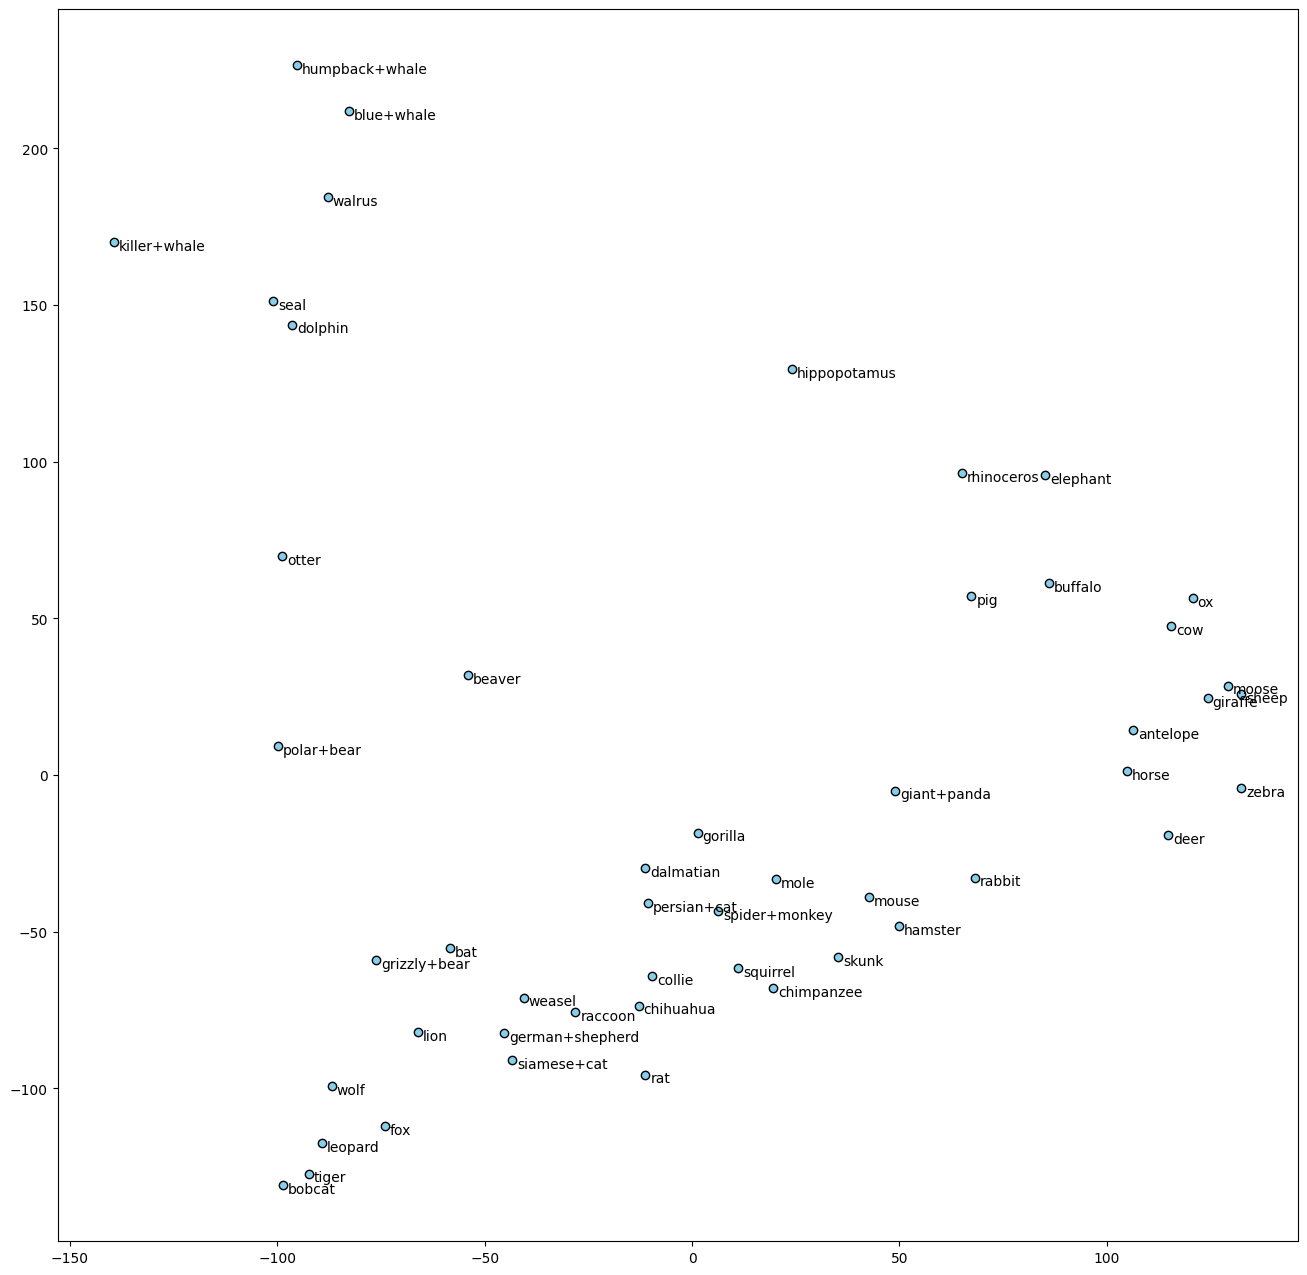

In [69]:
# กำหนดขนาดของรูป
plt.figure(figsize=(16,16))

# จงเติม argument ที่เหมาะสมในวงเล็บข้างล่างนี้
# รูปแบบของฟังก์ชันคือ plt.scatter(numpy array ของ x-coordinate, numpy array ของ y-coordinate)
plt.scatter( M2[:,0], M2[:,1], c='skyblue', edgecolors='black' )

# for loop เพื่อใส่คำกำกับ (annotate) ชื่อสัตว์ของแต่ละจุด วนให้ครบสัตว์ทุกชนิดที่อยู่ใน classes
# ใส่ numpy array ที่ผ่านการทำ PCA แล้วลงในตำแหน่งที่ระบุเพื่อบอกพิกัดที่ต้องวางคำกำกับ
for i in range(50):
  name=classes[i].split('\t')[1]
  plt.annotate(
          name,
          xy=(M2[i,0], M2[i,1]),
              xytext=(5, -8),
              textcoords='offset pixels')


plt.show()

#### Exercise 3

หากลุ่มสัตว์ต่างๆ ที่อยู่ใกล้กันมา 4 กลุ่ม แล้วลองอธิบายว่าสัตว์ในแต่ละกลุ่มมีอะไรที่เหมือนกัน

1.กลุ่มซ้ายบน humpback+whale, blue+whale, killer+whale, seal, dolphinเลี้ยงลูกด้วยนม, หายใจด้วยปอด,ใช้ชีวิตในทะเล, วิวัฒนาการจากสัตว์บก

2.กลุ่มซ้ายล่าง wolf, fox, leopard, tiger สัตว์เลี้ยงลูกด้วยนมกินเนื้อ

3.กลุ่มขวากลาง pig, buffalo, cow, ox สัตว์เลี้ยงลูกด้วยนมในอันดับ Artiodactyla ที่ถูกเลี้ยงโดยมนุษย์เพื่อเนื้อ นม และแรงงาน โดยหมูไม่ใช่สัตว์เคี้ยวเอื้องแต่ยังอยู่ในกลุ่มสัตว์เท้าแยกนิ้วคู่

4.กลุ่มกลางล่าง gorilla, dalmatan, mole, persian+cat, spider+monkey สัตว์เลี้ยงลูกด้วยนม, อยู่ในกลุ่มสัตว์เลี้ยงลูกด้วยนมที่มีกระดูกสันหลัง, สัตว์เลี้ยงลูกด้วยนมบก